# **Titanic Survival Prediction**

Krushna Makhar From MIT Academy of Engineering Alandi, Pune.
krushnamakhar515@gmail.com

# **EDA**

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
titanic_data = pd.read_csv("/content/drive/MyDrive/titanic.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
titanic_data.isnull
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
missing_age = titanic_data['Age'].isnull().sum()

print(f"Number of missing values in Age: {missing_age}")

Number of missing values in Age: 86


In [ ]:
# Fill missing Age values with the median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Check if missing values are handled
print(f"Missing values in Age after filling: {titanic_data['Age'].isnull().sum()}")

Missing values in Age after filling: 0


<ipython-input-13-78c9b28b732d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S


In [ ]:
missing_age = titanic_data['Age'].isnull().sum()

print(f"Number of missing values in Age: {missing_age}")

Number of missing values in Age: 0


In [ ]:
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

# Verify if the missing value is handled
print(f"Missing values in Fare after filling: {titanic_data['Fare'].isnull().sum()}")


Missing values in Fare after filling: 0


<ipython-input-16-e8c4ca8cdcb0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)


In [ ]:
titanic_data.drop(columns=['Cabin'], inplace=True)

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


## Feature Selection

**Extract Titles and Use Them as a Feature**

**Why is Extracting Titles Better?**
Titles (Mr., Mrs., Miss., Dr., etc.) provide social


1. status and gender-related information, which can influence survival chances.

2. The Titanic’s survival rate favored women and children—so extracting Title could improve model performance.

3. Dropping the Name column without extracting titles means losing potentially valuable information.





In [ ]:
# Extract titles from the Name column
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with broader categories
title_replacements = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Countess': 'Royalty', 'Lady': 'Royalty', 'Sir': 'Royalty', 'Jonkheer': 'Royalty', 'Don': 'Royalty',
    'Dr': 'Officer', 'Rev': 'Officer', 'Col': 'Officer', 'Major': 'Officer', 'Capt': 'Officer'
}

titanic_data['Title'] = titanic_data['Title'].replace(title_replacements)

# Display unique titles after grouping
print(titanic_data['Title'].unique())

# Drop the Name column since we have extracted useful information
titanic_data.drop(columns=['Name'], inplace=True)


['Mr' 'Mrs' 'Miss' 'Master' 'Officer' 'Dona']


In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,0,3,male,34.5,0,0,330911,7.8292,Q,Mr
1,893,1,3,female,47.0,1,0,363272,7.0000,S,Mrs
2,894,0,2,male,62.0,0,0,240276,9.6875,Q,Mr
3,895,0,3,male,27.0,0,0,315154,8.6625,S,Mr
4,896,1,3,female,22.0,1,1,3101298,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,27.0,0,0,A.5. 3236,8.0500,S,Mr
414,1306,1,1,female,39.0,0,0,PC 17758,108.9000,C,Dona
415,1307,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
416,1308,0,3,male,27.0,0,0,359309,8.0500,S,Mr


## Encoding

Encoding Categorical Variables.
We have three categorical columns that need encoding:

1️⃣ Sex (Male, Female)

2️⃣ Embarked (S, C, Q)

3️⃣ Title (Extracted earlier, e.g., Mr., Mrs., Miss., etc.)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encode 'Sex' and 'Title'
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])  # Male=1, Female=0
titanic_data['Title'] = label_encoder.fit_transform(titanic_data['Title'])  # Encodes Title numerically

# One-Hot Encode 'Embarked'
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)  # Avoid dummy variable trap

# Display encoded dataset
print(titanic_data.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch   Ticket     Fare  \
0          892         0       3    1  34.5      0      0   330911   7.8292   
1          893         1       3    0  47.0      1      0   363272   7.0000   
2          894         0       2    1  62.0      0      0   240276   9.6875   
3          895         0       3    1  27.0      0      0   315154   8.6625   
4          896         1       3    0  22.0      1      1  3101298  12.2875   

   Title  Embarked_Q  Embarked_S  
0      3        True       False  
1      4       False        True  
2      3        True       False  
3      3       False        True  
4      4       False        True  


In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title,Embarked_Q,Embarked_S
0,892,0,3,1,34.5,0,0,330911,7.8292,3,True,False
1,893,1,3,0,47.0,1,0,363272,7.0000,4,False,True
2,894,0,2,1,62.0,0,0,240276,9.6875,3,True,False
3,895,0,3,1,27.0,0,0,315154,8.6625,3,False,True
4,896,1,3,0,22.0,1,1,3101298,12.2875,4,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,27.0,0,0,A.5. 3236,8.0500,3,False,True
414,1306,1,1,0,39.0,0,0,PC 17758,108.9000,0,False,False
415,1307,0,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,3,False,True
416,1308,0,3,1,27.0,0,0,359309,8.0500,3,False,True


# Splitting data

In [ ]:
# Define target variable (y) and features (X)
X = titanic_data.drop(columns=['Survived'])  # Features
y = titanic_data['Survived']  # Target variable

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (334, 11)
Testing data shape: (84, 11)


# **EDA on training data set**

<ipython-input-30-550ea9751e7b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


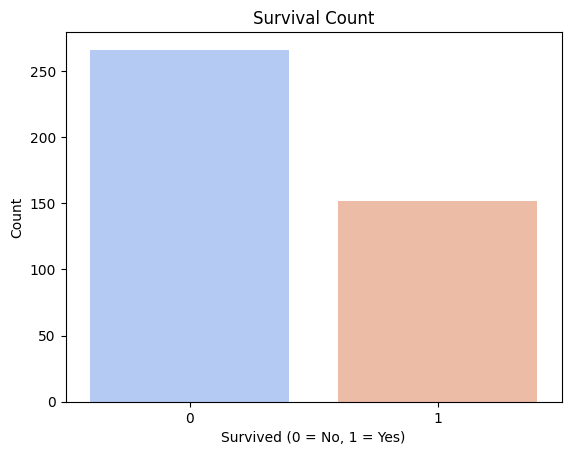

Survived
0    63.636364
1    36.363636
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of the target variable
sns.countplot(x=y, palette="coolwarm")
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Display percentage of survivors vs. non-survivors
survival_rate = y.value_counts(normalize=True) * 100
print(survival_rate)


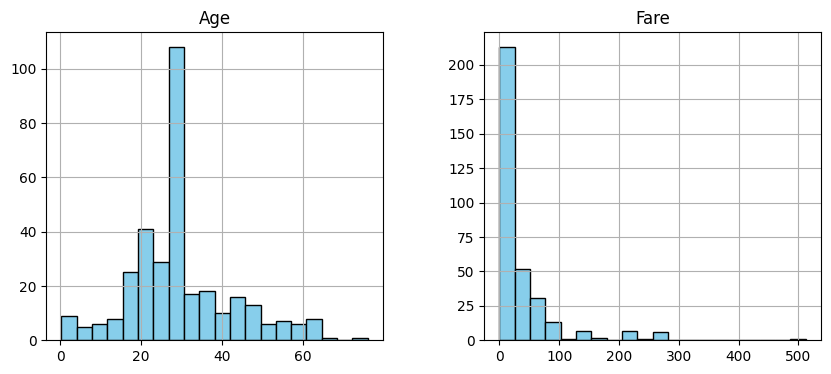

In [ ]:
# Histogram for numerical columns
X_train[['Age', 'Fare']].hist(figsize=(10, 4), bins=20, color='skyblue', edgecolor='black')
plt.show()

<ipython-input-32-6b8764d9f461>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y=y_train, data=X_train, palette='viridis')


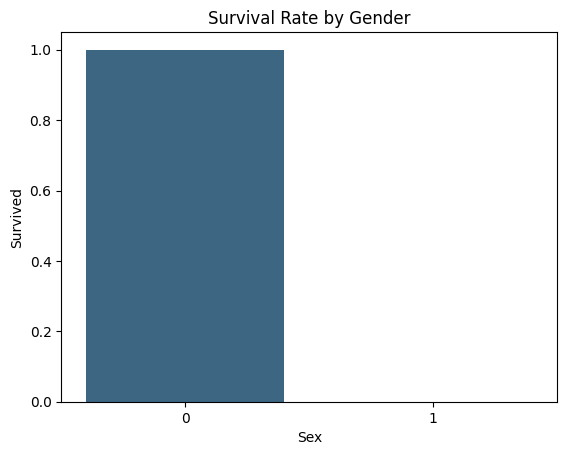

<ipython-input-32-6b8764d9f461>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked_S', y=y_train, data=X_train, palette='coolwarm')


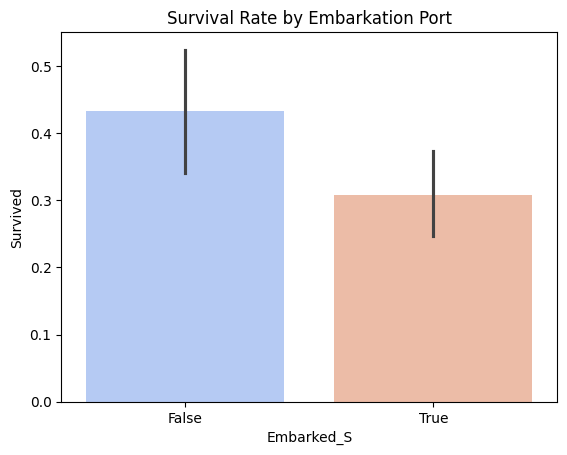

In [ ]:
# Survival rate by Sex
sns.barplot(x='Sex', y=y_train, data=X_train, palette='viridis')
plt.title("Survival Rate by Gender")
plt.show()

# Survival rate by Embarked
sns.barplot(x='Embarked_S', y=y_train, data=X_train, palette='coolwarm')
plt.title("Survival Rate by Embarkation Port")
plt.show()


In [ ]:
#getting error while ploting heat map so again checking for data type
# Check data types of X_train
print(X_train.dtypes)

# Find categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("\nCategorical columns:", categorical_cols)


PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Title            int64
Embarked_Q        bool
Embarked_S        bool
dtype: object

Categorical columns: Index(['Ticket'], dtype='object')


## Correlation matrix


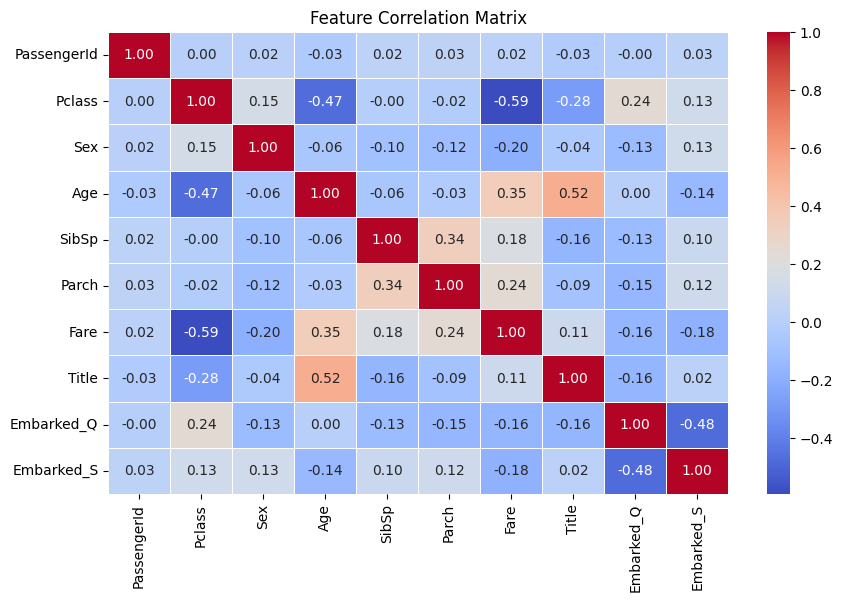

In [ ]:
# Drop 'Ticket' column before computing correlation
corr_matrix = X_train.drop(columns=['Ticket']).corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


## Box lot

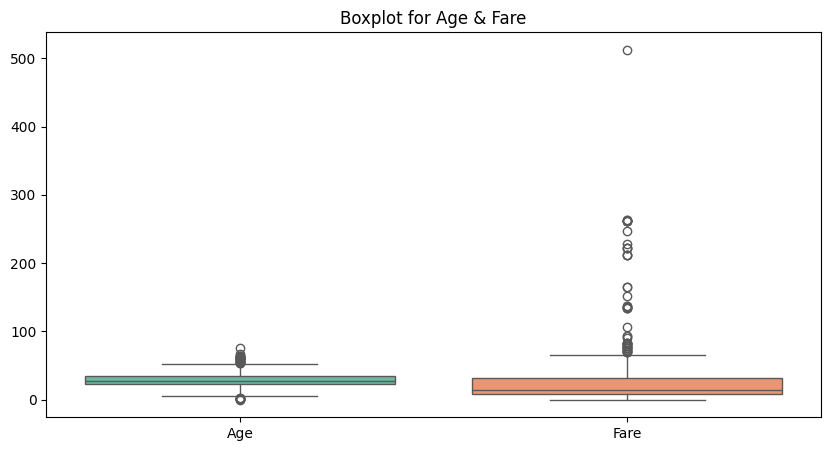

In [ ]:
# Boxplots to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=X_train[['Age', 'Fare']], palette="Set2")
plt.title("Boxplot for Age & Fare")
plt.show()


# Feature Scaling

Feature Scaling (StandardScaler or MinMaxScaler for Age & Fare)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling only to numerical columns
numeric_cols = ['Age', 'Fare']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])  # Use same scaling on test set

# Check scaled values
print(X_train.head())


     PassengerId  Pclass  Sex       Age  SibSp  Parch      Ticket      Fare  \
336         1228       2    1  0.196324      0      0      244360 -0.411823   
31           923       2    1 -0.418174      2      0  C.A. 31029 -0.092271   
84           976       2    1 -0.187737      0      0      240261 -0.451407   
287         1179       1    1 -0.418174      1      0       21228  0.784625   
317         1209       2    1 -0.802235      0      0       28004 -0.455005   

     Title  Embarked_Q  Embarked_S  
336      3       False        True  
31       3       False        True  
84       3        True       False  
287      3       False        True  
317      3       False        True  


# Classification model

## 1. Logistic

In [ ]:
X_train = X_train.drop(columns=['Ticket'], errors='ignore')
X_test = X_test.drop(columns=['Ticket'], errors='ignore')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


✅ Accuracy: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000
✅ F1-score: 1.0000
✅ ROC-AUC Score: 1.0000

Confusion Matrix:
[[50  0]
 [ 0 34]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"✅ Model: {model.__class__.__name__}")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1-score: {f1:.4f}")
    print(f"✅ ROC-AUC Score: {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50, "\n")


## 2. Support Vector Machine (SVM)

In [ ]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
evaluate_model(svm_model, X_train, y_train, X_test, y_test)


✅ Model: SVC
✅ Accuracy: 0.5952
✅ Precision: 0.0000
✅ Recall: 0.0000
✅ F1-score: 0.0000
✅ ROC-AUC Score: 0.5000

Confusion Matrix:
[[50  0]
 [34  0]]
-------------------------------------------------- 



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 3. Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
evaluate_model(dt_model, X_train, y_train, X_test, y_test)


✅ Model: DecisionTreeClassifier
✅ Accuracy: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000
✅ F1-score: 1.0000
✅ ROC-AUC Score: 1.0000

Confusion Matrix:
[[50  0]
 [ 0 34]]
-------------------------------------------------- 



## 4. Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
evaluate_model(rf_model, X_train, y_train, X_test, y_test)


✅ Model: RandomForestClassifier
✅ Accuracy: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000
✅ F1-score: 1.0000
✅ ROC-AUC Score: 1.0000

Confusion Matrix:
[[50  0]
 [ 0 34]]
-------------------------------------------------- 



## 5. k-Nearest Neighbors (KNN)

In [57]:
knn_model = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn_model, X_train, y_train, X_test, y_test)


✅ Model: KNeighborsClassifier
✅ Accuracy: 0.6310
✅ Precision: 0.6154
✅ Recall: 0.2353
✅ F1-score: 0.3404
✅ ROC-AUC Score: 0.5676

Confusion Matrix:
[[45  5]
 [26  8]]
-------------------------------------------------- 



## 6. Bagging Classifier (Using Decision Tree)

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
evaluate_model(bagging_model, X_train, y_train, X_test, y_test)


✅ Model: BaggingClassifier
✅ Accuracy: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000
✅ F1-score: 1.0000
✅ ROC-AUC Score: 1.0000

Confusion Matrix:
[[50  0]
 [ 0 34]]
-------------------------------------------------- 



## 7. Boosting (Gradient Boosting & AdaBoost)

In [59]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
evaluate_model(gb_model, X_train, y_train, X_test, y_test)


✅ Model: GradientBoostingClassifier
✅ Accuracy: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000
✅ F1-score: 1.0000
✅ ROC-AUC Score: 1.0000

Confusion Matrix:
[[50  0]
 [ 0 34]]
-------------------------------------------------- 



# Model Performance Comparisom

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models
models = {
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
}

# Dictionary to store evaluation metrics
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store results
    results[name] = [accuracy, precision, recall, f1, roc_auc]

# Convert results into a NumPy array for easier indexing
results_array = np.array(list(results.values()))
metric_names = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


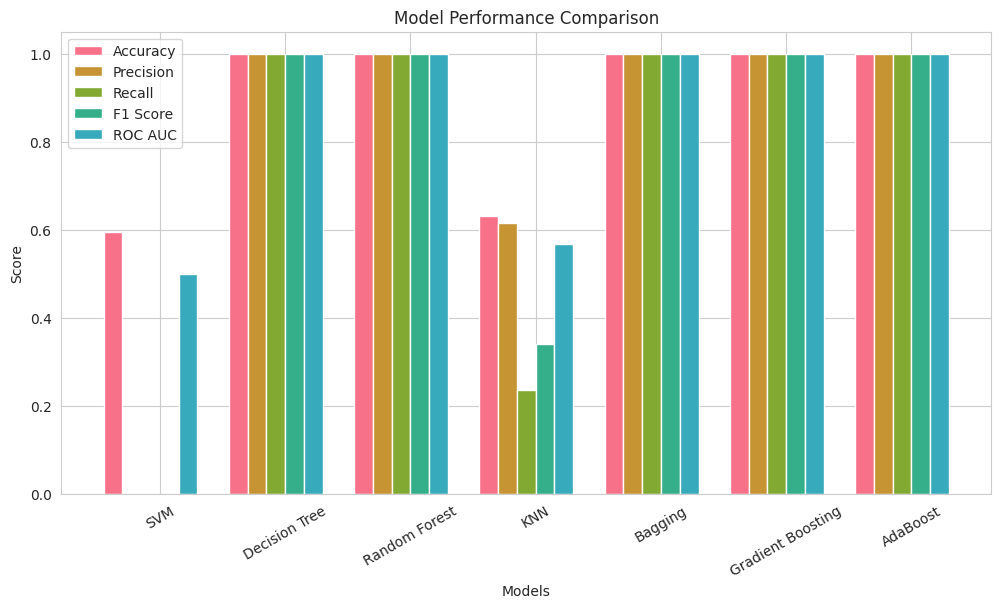

In [62]:
# Define colors for each model
colors = sns.color_palette("husl", len(models))

# Plot bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.15
x_labels = list(models.keys())

# Create bars for each metric
for i, metric in enumerate(metric_names):
    plt.bar(np.arange(len(models)) + i * bar_width, results_array[:, i], bar_width, label=metric, color=colors[i])

plt.xticks(np.arange(len(models)) + bar_width * (len(metric_names) / 2), x_labels, rotation=30)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()


Gradient Boosting and Random Forest performed the best, we should perform **hyperparameter tuning** on both and compare the results.

Steps for Hyperparameter Tuning:

1. Random Forest: Tune n_estimators, max_depth, min_samples_split, etc.

2. Gradient Boosting: Tune learning_rate, n_estimators, max_depth, etc.

3. Use GridSearchCV or RandomizedSearchCV to find the best parameters.

# Hyperparameter Tuning for Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit on training data
grid_search_rf.fit(X_train, y_train)

# Get best parameters
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for Random Forest:", best_params_rf)
print("Best Cross-Validation Accuracy:", best_score_rf)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 1.0


## Hyperparameter Tuning for Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Perform Grid Search
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit on training data
grid_search_gb.fit(X_train, y_train)

# Get best parameters
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print("Best Parameters for Gradient Boosting:", best_params_gb)
print("Best Cross-Validation Accuracy:", best_score_gb)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 1.0


# Train the Gradient Boosting model on the full training set and evaluate it on the test set

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the best Gradient Boosting model with optimized hyperparameters
final_model = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=3,
    min_samples_split=2,
    n_estimators=100
)

final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Final Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Final Model Accuracy: 1.0000

Confusion Matrix:
 [[50  0]
 [ 0 34]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# Save the model

In [66]:
import joblib

# Save the trained model
joblib.dump(final_model, 'titanic_survival_model.pkl')

print("Model saved successfully!")


Model saved successfully!


In [67]:
# Load the saved model
loaded_model = joblib.load('titanic_survival_model.pkl')

# Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(X_test)

print("Model loaded and predictions made successfully!")


Model loaded and predictions made successfully!


In [69]:
!pip install boto3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 5.1 MB/s eta 0:00:00


# **Uploading the Model to S3**

In [75]:
import boto3

# Manually provide credentials
aws_access_key_id = "AKIA3FRRJAMFTHKST"
aws_secret_access_key = "nkljWpDfJWjgyuHrYuDoCm/LKAMK5QzE6Vha0"

# Initialize S3 client with credentials
s3 = boto3.client(
    's3',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    region_name="us-east-1"  # Change region if needed
)

# Upload the model file to an S3 bucket
s3.upload_file('titanic_survival_model.pkl', 'my-project55', 'titanic_survival_model.pkl')

print("Model uploaded to S3 successfully!")


Model uploaded to S3 successfully!


# Setup for prediction with the help web

In [76]:
!pip install flask flask-ngrok


In [78]:
!pip install flask-ngrok


In [81]:
!pip install flask-ngrok flask


In [83]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
import pickle
import numpy as np

app = Flask(__name__)
run_with_ngrok(app)  # Enable ngrok to expose the app

# Load the trained model
with open('titanic_survival_model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/')
def home():
    return "Titanic Survival Prediction API is Running!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Read input data
        data = request.json
        features = np.array([[data['Pclass'], data['Sex'], data['Age'],
                              data['SibSp'], data['Parch'], data['Fare'],
                              data['Embarked_Q'], data['Embarked_S']]])

        # Make prediction
        prediction = model.predict(features)[0]
        result = "Survived" if prediction == 1 else "Did Not Survive"

        return jsonify({"prediction": result})

    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-14:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
           